

# Project: Warangling and analyze WeRateDogs Twitter data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> From this project I will useg Python and its libraries,to gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it for \] data wrangling.and will analyses and visualizations using Python.

<a id='wrangling'></a>
## Data Wrangling-Gathering data 

> The first is to collect individual data sets

In [356]:
# import modules
import requests
import pandas as pd
import numpy as np
import json
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline
pd.set_option('max_colwidth', 300)

In [357]:
# Download predictive data for Twitter images
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/数据清洗/WeRateDogs项目/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)

In [358]:
# Import download data into the array image_predictions
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [359]:
# import the source data
image_predictions = pd.read_csv('image-predictions.tsv',sep='\t')

In [360]:
import tweepy
import time
from tweepy import OAuthHandler
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [361]:
# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [ ]:
# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         #print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             #print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             #print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# #print(fails_dict)

In [362]:
df_list = []
file = open('tweet_json.txt')
for line in file.readlines():
    print(line)
    tweet_line = json.loads(line)
    tweet_id = tweet_line['id']
    retweet_count = tweet_line['retweet_count']
    favorite_count = tweet_line['favorite_count']
    df_list.append({'tweet_id':tweet_id,
                    'retweet_count':retweet_count,
                    'favorite_count':favorite_count})
# Convert to an array of tweets
tweet_supply = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])
tweet_supply.info()


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




{"created_at": "Mon Dec 07 20:07:04 +0000 2015", "id": 673956914389192708, "id_str": "673956914389192708", "full_text": "This is one esteemed pupper. Just graduated college. 10/10 what a champ https://t.co/nyReCVRiyd", "truncated": false, "display_text_range": [0, 95], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 673956906873036801, "id_str": "673956906873036801", "indices": [72, 95], "media_url": "http://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg", "media_url_https": "https://pbs.twimg.com/media/CVpgPGwWoAEV7gG.jpg", "url": "https://t.co/nyReCVRiyd", "display_url": "pic.twitter.com/nyReCVRiyd", "expanded_url": "https://twitter.com/dog_rates/status/673956914389192708/photo/1", "type": "photo", "sizes": {"large": {"w": 720, "h": 960, "resize": "fit"}, "small": {"w": 340, "h": 453, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 600, "h": 800, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 673

In [363]:
tweet_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [364]:
print(df_list)

[{'tweet_id': 892420643555336193, 'retweet_count': 8853, 'favorite_count': 39467}, {'tweet_id': 892177421306343426, 'retweet_count': 6514, 'favorite_count': 33819}, {'tweet_id': 891815181378084864, 'retweet_count': 4328, 'favorite_count': 25461}, {'tweet_id': 891689557279858688, 'retweet_count': 8964, 'favorite_count': 42908}, {'tweet_id': 891327558926688256, 'retweet_count': 9774, 'favorite_count': 41048}, {'tweet_id': 891087950875897856, 'retweet_count': 3261, 'favorite_count': 20562}, {'tweet_id': 890971913173991426, 'retweet_count': 2158, 'favorite_count': 12041}, {'tweet_id': 890729181411237888, 'retweet_count': 16716, 'favorite_count': 56848}, {'tweet_id': 890609185150312448, 'retweet_count': 4429, 'favorite_count': 28226}, {'tweet_id': 890240255349198849, 'retweet_count': 7711, 'favorite_count': 32467}, {'tweet_id': 890006608113172480, 'retweet_count': 7624, 'favorite_count': 31166}, {'tweet_id': 889880896479866881, 'retweet_count': 5156, 'favorite_count': 28268}, {'tweet_id': 8

## Evaluating Data

> The following cells describe the columns of each table in the WeRateDogs data set. To observe the table and the corresponding description, display the entire table by displaying the collected pandas DataFrame. This task is part of the mechanical part of pandas visual evaluation.

In [365]:
# show the twitter_archive table
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [366]:
# Show the tweet_supply table
tweet_supply

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [367]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [368]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.3560000000e+03,7.8000000000e+01,7.8000000000e+01,1.8100000000e+02,1.8100000000e+02,2356.0000000000,2356.0000000000
mean,7.4277159032e+17,7.4550791786e+17,2.0141706361e+16,7.7203996104e+17,1.2416983653e+16,13.1264855688,10.4554329372
std,6.8567047445e+16,7.5824920044e+16,1.2527966626e+17,6.2369278105e+16,9.5992535332e+16,45.8766476233,6.7452372269
min,6.6602088802e+17,6.6581469670e+17,1.1856342000e+07,6.6610413329e+17,7.8321400000e+05,0.0000000000,0.0000000000
25%,6.7839893821e+17,6.7574191199e+17,3.0863744875e+08,7.1863149768e+17,4.1969838350e+09,10.0000000000,10.0000000000
50%,7.1962793472e+17,7.0387084023e+17,4.1969838350e+09,7.8046570930e+17,4.1969838350e+09,11.0000000000,10.0000000000
75%,7.9933730495e+17,8.2578037129e+17,4.1969838350e+09,8.2031463378e+17,4.1969838350e+09,12.0000000000,10.0000000000
max,8.9242064356e+17,8.8626635708e+17,8.4054786435e+17,8.8747395710e+17,7.8746177844e+17,1776.0000000000,170.0000000000


In [369]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1946,673705679337693185,NaN,NaN,2015-12-07 03:28:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Dot. He found out you only pretended to throw the ball that one time. You don't fuck with Dot. 8/10 https://t.co/Ymg4fwKlZd,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673705679337693185/photo/1,8,10,Dot,None,None,None,None
1812,676811746707918848,NaN,NaN,2015-12-15 17:11:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Penny &amp; Gizmo. They are practicing their caroling. The ambition in the room is tangible. 9/10 for both https://t.co/aqBHjjh5VD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676811746707918848/photo/1,9,10,Penny,None,None,None,None
328,833722901757046785,NaN,NaN,2017-02-20 17:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bronte. She's fairly h*ckin aerodynamic. Also patiently waiting for mom to make her a main character. 13/10 would be an honor to pet https://t.co/w1MQWO2PET,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/833722901757046785/photo/1,https://twitter.com/dog_rates/status/833722901757046785/photo/1",13,10,Bronte,None,None,None,None
2323,666428276349472768,NaN,NaN,2015-11-17 01:30:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an Austrian Pulitzer. Collectors edition. Levitates (?). 7/10 would garden with https://t.co/NMQq6HIglK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666428276349472768/photo/1,7,10,None,None,None,None,None
232,847962785489326080,NaN,NaN,2017-04-01 00:04:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Georgie. He's very shy. Only puppears when called. Aggressively average at fetch. Unique front paws. Looks slippery. 10/10 would pet https://t.co/rcDs5LkiSj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/847962785489326080/photo/1,10,10,Georgie,None,None,None,None
80,877316821321428993,NaN,NaN,2017-06-21 00:06:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Dante. At first he wasn't a fan of his new raincoat, then he saw his reflection. H*ckin handsome. 13/10 for water resistant good boy https://t.co/SHRTIo5pxc",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/877316821321428993/photo/1,https://twitter.com/dog_rates/status/877316821321428993/photo/1",13,10,Dante,None,None,None,None
247,845459076796616705,NaN,NaN,2017-03-25 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Here's a heartwarming scene of a single father raising his two pups. Downright awe-inspiring af. 12/10 for everyone https://…,7.5628853403e+17,4196983835.0,2016-07-22 00:43:32 +0000,"https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1,https://twitter.com/dog_rates/status/756288534030475264/photo/1",12,10,None,None,None,None,None
318,834574053763584002,NaN,NaN,2017-02-23 01:22:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo fully pupared for a shower. H*ckin exquisite balance. Sneaky tongue slip too. 13/10 https://t.co/UtEVnQ1ZPg,NaN,NaN,NaN,https://twitter.com/dog_rates/status/834574053763584002/photo/1,13,10,None,doggo,None,None,None
2192,668932921458302977,NaN,NaN,2015-11-23 23:23:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Herald. He likes to swing. Subtle tongue slip. Owner good at b-bal

In [370]:
twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [371]:
twitter_archive.timestamp.sort_values(ascending=False)

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [372]:
# since name are using capital 'None' define N/A
no_name_mask = (twitter_archive.name.str.islower())|(twitter_archive.name =='None')
# use~no_name_mask to fliter the incorrect name as text
twitter_archive.loc[no_name_mask,["name", "text"]].sample(10)

,name,text
1791,None,Downright inspiring 12/10 https://t.co/vSLtYBWHcQ
2172,None,Just got home from college. Dis my dog. She does all my homework. Big red turd in background. 13/10 no bias at all https://t.co/6WGFp9cuj6
2006,None,When you accidentally open up the front facing camera. 10/10 https://t.co/jDXxZARQIZ
508,None,I'm happy to inform you all that Jake is in excellent hands. 13/10 for him and his new family \nhttps://t.co/LRCTJpnCnS https://t.co/wZz7fI6XO1
47,None,"Please only send dogs. We don't rate mechanics, no matter how h*ckin good. Thank you... 13/10 would sneak a pat https://t.co/Se5fZ9wp5E"
2350,a,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe
1450,None,Here's a dog enjoying a sunset. 11/10 would trade lives with https://t.co/VsQdLxrv9h
1488,None,Please only send in dogs. Don't submit other things like this pic of Kenny Chesney in a bathtub. Thank you. 9/10 https://t.co/TMpDHHGspy
1938,None,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M
939,None,So this just changed my life. 13/10 please enjoy https://t.co/dsv4xAtfv7


In [373]:
# check data set
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [ ]:
# import re
# rw=0
# for x in twitter_archive.rating_numerator:
#     try:
#         xnum=re.findall(r'^\d+$', x)
#         if(len(xnum)==0):
# #             twitter_archive.rating_numerator[rw]=0
# #     except Exception:
#       twitter_archive.rating_numerator[rw]=0
#     rw=rw+1

In [ ]:
# for x in twitter_archive.rating_numerator:
#     if(x=='None'):
#         print(x)

In [375]:
twitter_archive.rating_numerator=twitter_archive.rating_numerator.fillna(value=np.nan)
twitter_archive.rating_numerator=pd.to_numeric(twitter_archive.rating_numerator)
twitter_archive.loc[twitter_archive.rating_numerator>20,['rating_numerator', 'text']]

,rating_numerator,text
1351,60,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1433,44,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1634,143,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
1635,121,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55
1712,26,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD
1779,144,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
1843,88,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
2074,420,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY


In [376]:
twitter_archive.loc[twitter_archive.rating_denominator != 10,["rating_denominator", "text"]]

,rating_denominator,text
313,0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
342,15,@docmisterio account started on 11/15/15
433,70,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
516,7,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784,11,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…"
902,150,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1068,11,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1120,170,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1165,20,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1202,50,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


In [379]:
# check duplicate 
twitter_archive.loc[[784, 1068]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.4037318919e+17,4196983835.0,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",0,11,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",0,11,None,None,None,None,None


In [378]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [380]:
twitter_archive.name.value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Tucker           10
Lola             10
Penny            10
Bo                9
Winston           9
Sadie             8
the               8
Toby              7
Daisy             7
Buddy             7
Bailey            7
an                7
Milo              6
Leo               6
Rusty             6
Stanley           6
Jack              6
Scout             6
Jax               6
Oscar             6
Bella             6
Koda              6
Dave              6
Sunny             5
               ... 
Blue              1
Kuyu              1
Godi              1
Grey              1
Tommy             1
Vince             1
Stark             1
Anthony           1
Arlo              1
by                1
Kathmandu         1
Scruffers         1
Karl              1
Shooter           1
Winifred          1
Peanut            1
Gòrdón            1
Alexanderson      1
Vinscent          1


In [381]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [382]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [383]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [384]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [385]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [386]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [387]:
pd.set_option('precision', 10)
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.0750000000e+03,2075.0000000000,2075.0000000000,2075.0000000000,2075.0000000000
mean,7.3845135785e+17,1.2038554217,0.5945482636,0.1345886095,0.0603241686
std,6.7852033330e+16,0.5618750280,0.2711735169,0.1006657394,0.0509059313
min,6.6602088802e+17,1.0000000000,0.0443334000,0.0000000101,0.0000000002
25%,6.7648350714e+17,1.0000000000,0.3644120000,0.0538862500,0.0162224000
50%,7.1199880986e+17,1.0000000000,0.5882300000,0.1181810000,0.0494438000
75%,7.9320344853e+17,1.0000000000,0.8438550000,0.1955655000,0.0918075500
max,8.9242064356e+17,4.0000000000,1.0000000000,0.4880140000,0.2734190000


In [388]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1906,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,1,barbell,0.971581,False,dumbbell,0.0284179,False,go-kart,0.0000005595,False
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/852223481894903808/pu/img/JWNq40ol4DXvHoUP.jpg,1,prison,0.352793,False,dishwasher,0.1107230,False,file,0.0941120000,False
1618,802572683846291456,https://pbs.twimg.com/media/CyNPmJgXcAECPuB.jpg,1,golden_retriever,0.610171,True,Labrador_retriever,0.1732520,True,cocker_spaniel,0.1632570000,True
243,670452855871037440,https://pbs.twimg.com/media/CU3tUC4WEAAoZby.jpg,1,Arctic_fox,0.188174,False,indri,0.1235840,False,malamute,0.0803795000,True
1040,712092745624633345,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,1,triceratops,0.235373,False,llama,0.1531260,False,three-toed_sloth,0.1118400000,False


In [389]:
# The number of dogs that are not correctly identified
len(image_predictions[~(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

324

In [390]:
# he number of dogs that are correctly identified
len(image_predictions[(image_predictions.p1_dog | image_predictions.p2_dog | image_predictions.p3_dog)])

1751

In [391]:
tweet_supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [392]:
tweet_supply.describe()

,tweet_id,retweet_count,favorite_count
count,2.3540000000e+03,2354.0000000000,2354.0000000000
mean,7.4269781644e+17,3164.7973661852,8080.9685641461
std,6.8528120713e+16,5284.7703635353,11814.7713341274
min,6.6602088802e+17,0.0000000000,0.0000000000
25%,6.7839751024e+17,624.5000000000,1415.0000000000
50%,7.1945957111e+17,1473.5000000000,3603.5000000000
75%,7.9930584924e+17,3652.0000000000,10122.2500000000
max,8.9242064356e+17,79515.0000000000,132810.0000000000


In [393]:
tweet_supply[tweet_supply.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [302]:
tweet_supply.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

## An overview of the data set reveals a quality problem

### twitter_archive table
1. Data type in 'timestamp' column is string instead of datetime, and there should be columns for year, month and day
2. retweeted_status_id tag fields have non-empty values and there are retweeted tweets.
3. Column 'name' has values 'None', 'a', 'an', 'the' and other wrong ones
4. Columns [doggo, floofer, pupper, puppo] have "None" values instead of null values
5. There are rating_denonimator values other than 10 and wrong numerator values
6. Drop columns that won't be used for the analysis

### image_predictions table
7. Names in columns p1, p2 and p3 have different capitalisations
8. Only use first (stronger) prediction and rename the columns to 'prediction', 'confidence' and 'is_dog'
9. Drop duplicated jpg_url rows
10. Drop columns that won't be used for analysis

### tweet_supply table
11. No data due to Internet block in Mainland China or my firm certicate no feedback from twitter api



# Neatness issues

1. Merge all tables

### twitter_archive table
2. Mutliple columns for dog type variable (doggo, floofer, pupper, puppo)

### image_predictions table
3. Only use first (stronger) prediction and rename the columns to 'dog_category', 'reliability' and 'is_dog'

## Data Cleaning

In [394]:
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_supply_clean = tweet_supply.copy()

### twitter_archive table

1. Data type in 'timestamp' column is string instead of datetime, and there should be columns for year, month and day

In [395]:
# convert to datetime
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

# add year, month and day columns
twitter_archive_clean['year'] = twitter_archive_clean.timestamp.dt.year
twitter_archive_clean['month'] = twitter_archive_clean.timestamp.dt.month
twitter_archive_clean['day'] = twitter_archive_clean.timestamp.dt.day

# test
twitter_archive_clean.info()
twitter_archive_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
year                    

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year,month,day
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,0,10,Phineas,None,None,None,None,2017,8,1
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,0,10,Tilly,None,None,None,None,2017,8,1
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,0,10,Archie,None,None,None,None,2017,7,31
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,0,10,Darla,None,None,None,None,2017,7,30
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",0,10,Franklin,None,None,None,None,2017,7,29


2. retweeted_status_id tag fields have non-empty values and there are retweeted tweets.

In [396]:
# small capital as the string 'None' as the extracted error value or other situation

retweeted_mask = twitter_archive_clean[(twitter_archive_clean.retweeted_status_id.notnull())\
|(twitter_archive_clean.retweeted_status_user_id.notnull())\
|(twitter_archive_clean.retweeted_status_timestamp.notnull())].index
# cleaning
twitter_archive_clean.drop(retweeted_mask, inplace=True)

In [397]:
print(retweeted_mask)

Int64Index([  19,   32,   36,   68,   73,   74,   78,   91,   95,   97,
            ...
             926,  937,  943,  949, 1012, 1023, 1043, 1242, 2259, 2260],
           dtype='int64', length=181)


In [398]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 20 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
year                          

>3. Column 'name' has values 'None', 'a', 'an', 'the' and other wrong ones

In [399]:
no_name_mask = (twitter_archive_clean.name.str.islower())|(twitter_archive_clean.name =='None')
twitter_archive_clean.name = twitter_archive_clean.name[~no_name_mask]

In [400]:
print(no_name_mask)

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7        True
8       False
9       False
10      False
11      False
12       True
13      False
14      False
15      False
16      False
17      False
18      False
20      False
21      False
22       True
23      False
24       True
25       True
26      False
27      False
28      False
29      False
30       True
        ...  
2326     True
2327     True
2328     True
2329     True
2330     True
2331     True
2332     True
2333     True
2334     True
2335     True
2336     True
2337     True
2338     True
2339     True
2340     True
2341     True
2342     True
2343     True
2344     True
2345     True
2346     True
2347     True
2348     True
2349     True
2350     True
2351     True
2352     True
2353     True
2354     True
2355     True
Name: name, Length: 2175, dtype: bool


In [401]:
twitter_archive_clean.name[twitter_archive_clean.name.isin(['a', 'an', 'the'])]

Series([], Name: name, dtype: object)

In [402]:
twitter_archive_clean.name.value_counts()

Charlie         11
Lucy            11
Cooper          10
Oliver          10
Tucker           9
Penny            9
Sadie            8
Winston          8
Lola             8
Daisy            7
Toby             7
Bo               6
Bailey           6
Stanley          6
Bella            6
Koda             6
Oscar            6
Jax              6
Leo              5
Milo             5
Chester          5
Bentley          5
Scout            5
Rusty            5
Louis            5
Buddy            5
Dave             5
Archie           4
Chip             4
Alfie            4
                ..
Lillie           1
Julio            1
Gidget           1
Striker          1
Shakespeare      1
Rooney           1
Carll            1
Arya             1
Evy              1
Tupawc           1
Major            1
Kial             1
Pippin           1
General          1
Kathmandu        1
Scruffers        1
Karl             1
Shooter          1
Winifred         1
Peanut           1
Gòrdón           1
Hercules    

>Columns [doggo, floofer, pupper, puppo] have "None" values instead of null values

>Drop columns that won't be used for the analysis 
## neatness issue
> Mutliple columns for dog type variable (doggo, floofer, pupper, puppo)

In [403]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
                            'retweeted_status_user_id','retweeted_status_timestamp','doggo', 'floofer',\
                            'pupper','puppo'], axis=1, inplace=True)


In [404]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 203.9+ KB


In [405]:
print(twitter_archive_clean)

                tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:4

In [ ]:
# twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(float)

5. There are rating_denonimator values other than 10 and wrong numerator values

In [406]:
# to retain consistency in the analysis, drop rows with denominator values other than 10

twitter_archive_clean2 = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

# test
print(twitter_archive_clean2.rating_denominator)

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
30      10
        ..
2325    10
2326    10
2327    10
2328    10
2329    10
2330    10
2331    10
2332    10
2333    10
2334    10
2336    10
2337    10
2338    10
2339    10
2340    10
2341    10
2342    10
2343    10
2344    10
2345    10
2346    10
2347    10
2348    10
2349    10
2350    10
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 2153, dtype: int64


In [407]:
twitter_archive_clean=twitter_archive_clean2
print(twitter_archive_clean)

                tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:4

In [408]:
# convert rating_numerator column to float type
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(float)

# find ratings with decimal places and check their text
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",0.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",0.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,0.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0


In [409]:
# replace found values
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
twitter_archive_clean.loc[(twitter_archive_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#test
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator']]) 

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


,tweet_id,text,rating_numerator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


### image_predictionstable

7.Names in columns p1, p2 and p3 have different capitalisations

In [410]:
# lowercase, remove leading and trailing spaces and replace spaces with underscores
image_predictions_clean.p1 = image_predictions_clean.p1.str.lower().str.strip().replace(' ', '_')
image_predictions_clean.p2 = image_predictions_clean.p2.str.lower().str.strip().replace(' ', '_')
image_predictions_clean.p3 = image_predictions_clean.p3.str.lower().str.strip().replace(' ', '_')

#test
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.1566650,True,shetland_sheepdog,0.0614285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.0741917,True,rhodesian_ridgeback,0.0720100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.1385840,True,bloodhound,0.1161970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.3606870,True,miniature_pinscher,0.2227520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.2436820,True,doberman,0.1546290,True


In [411]:
print(twitter_archive_clean)

                tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:4

Neatness issues 3&Quality issues 8 
Only use first (stronger) prediction and rename the columns to 'dog_category', 'reliability' and 'is_dog'

In [412]:
# Select the most trusted recognition results identified as dogs, and save the columns 'dog_category', 'reliability', 'is_dog'
# Since recognition credibility is high to low according to p1 to p3, priority is given to p1 identified as a dog, followed by p2 or p3,
# When none of the three results are identified as dogs, select p1 as the final result
# Condition 1, p1 is recognized as dog, select p1
# Condition 2, p1 recognized as non-dog, p2 recognized as non-dog, select p1
# Condition 3, p1 is recognized as non-dog, p2 is recognized as dog, select p2
image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2,\
                                                   image_predictions_clean.p1)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_conf,\
                                                   image_predictions_clean.p1_conf)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.p1_dog & image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p2_dog,\
                                                   image_predictions_clean.p1_dog)

# At the end of the comparison between p1 and p2, is_dog the selection results and p3
# Condition 1, is_dog recognized as dog, select is_dog
# Condition 2, is_dog recognized as non-dog, p3 recognized as non-dog, select is_dog
# Condition 3, is_dog recognized as non-dog, p3 recognized as dog, select p3

image_predictions_clean['dog_category'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3,\
                                                   image_predictions_clean.dog_category)
image_predictions_clean['reliability'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_conf,\
                                                   image_predictions_clean.reliability)
image_predictions_clean['is_dog'] = np.where(~image_predictions_clean.is_dog & image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.p3_dog,\
                                                   image_predictions_clean.is_dog)

In [413]:
# test
len(image_predictions_clean[image_predictions_clean.is_dog])

1751

In [414]:
#Remove the candidate identification results of 'p1', 'p2' and 'p3'.
image_predictions_clean.drop([ 'p1','p1_conf','p1_dog', 'p2','p2_conf','p2_dog', 'p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [415]:
# test
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
tweet_id        2075 non-null int64
jpg_url         2075 non-null object
img_num         2075 non-null int64
dog_category    2075 non-null object
reliability     2075 non-null float64
is_dog          2075 non-null bool
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


> 9. Drop duplicated jpg_url rows
>10. Drop columns that won't be used for analysis

In [416]:
image_predictions_clean.drop_duplicates(subset="jpg_url", inplace=True)

image_predictions_clean.drop(['jpg_url', 'img_num',], axis=1, inplace=True)

#test
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id        2009 non-null int64
dog_category    2009 non-null object
reliability     2009 non-null float64
is_dog          2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 64.7+ KB


In [417]:
tweet_supply_clean.tweet_id=tweet_supply_clean.tweet_id.astype('float64')
tweet_supply_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null float64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: float64(1), int64(2)
memory usage: 55.2 KB


In [418]:
tweet_supply_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null float64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: float64(1), int64(2)
memory usage: 55.2 KB


In [419]:
print(twitter_archive_clean)

                tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    888078434458587136 2017-07-20 16:4

In [344]:
# image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('float64')

In [420]:
image_predictions_clean.info()
tweet_supply_clean.info()
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id        2009 non-null int64
dog_category    2009 non-null object
reliability     2009 non-null float64
is_dog          2009 non-null bool
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 64.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null float64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: float64(1), int64(2)
memory usage: 55.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2153 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2153 non-null int64
timestamp             2153 non-null datetime64[ns]
source                2153 non-null object
text                  2153 non-null object
expanded_urls         2099 non-null object
rating_numerator      2153 non-null float64
rating_denominator    2153 non

In [421]:
print(tweet_supply_clean.tweet_id)
print(twitter_archive_clean.tweet_id)
print(image_predictions_clean.tweet_id)

0       8.9242064356e+17
1       8.9217742131e+17
2       8.9181518138e+17
3       8.9168955728e+17
4       8.9132755893e+17
5       8.9108795088e+17
6       8.9097191317e+17
7       8.9072918141e+17
8       8.9060918515e+17
9       8.9024025535e+17
10      8.9000660811e+17
11      8.8988089648e+17
12      8.8966538833e+17
13      8.8963883758e+17
14      8.8953113534e+17
15      8.8927884198e+17
16      8.8891723812e+17
17      8.8880498920e+17
18      8.8855496272e+17
19      8.8807843446e+17
20      8.8770528938e+17
21      8.8751713916e+17
22      8.8747395710e+17
23      8.8734321705e+17
24      8.8710139280e+17
25      8.8698323352e+17
26      8.8673688052e+17
27      8.8668033648e+17
28      8.8636614473e+17
29      8.8626700929e+17
              ...       
2324    6.6641150755e+17
2325    6.6640712686e+17
2326    6.6639624737e+17
2327    6.6637375374e+17
2328    6.6636275891e+17
2329    6.6635328846e+17
2330    6.6634541758e+17
2331    6.6633788230e+17
2332    6.6629391163e+17


### Neatness issues

1. Merge all tables

In [422]:
# Merge
twitter_archive_clean1 = twitter_archive_clean.merge(image_predictions_clean, how='inner', on=['tweet_id'])

twitter_archive_clean1.info()
print(twitter_archive_clean1.tweet_id)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1976 entries, 0 to 1975
Data columns (total 14 columns):
tweet_id              1976 non-null int64
timestamp             1976 non-null datetime64[ns]
source                1976 non-null object
text                  1976 non-null object
expanded_urls         1976 non-null object
rating_numerator      1976 non-null float64
rating_denominator    1976 non-null int64
name                  1347 non-null object
year                  1976 non-null int64
month                 1976 non-null int64
day                   1976 non-null int64
dog_category          1976 non-null object
reliability           1976 non-null float64
is_dog                1976 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 218.1+ KB
0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
5       891087950875897856
6       890971913173991426
7      

In [423]:
twitter_archive_clean1 = twitter_archive_clean1.merge(tweet_supply_clean , how='inner', on=['tweet_id'])

twitter_archive_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1288
Data columns (total 16 columns):
tweet_id              1289 non-null int64
timestamp             1289 non-null datetime64[ns]
source                1289 non-null object
text                  1289 non-null object
expanded_urls         1289 non-null object
rating_numerator      1289 non-null float64
rating_denominator    1289 non-null int64
name                  861 non-null object
year                  1289 non-null int64
month                 1289 non-null int64
day                   1289 non-null int64
dog_category          1289 non-null object
reliability           1289 non-null float64
is_dog                1289 non-null bool
retweet_count         1289 non-null int64
favorite_count        1289 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 162.4+ KB


In [424]:
twitter_archive_clean=twitter_archive_clean1

In [425]:
# retweet_count and favorite_count define
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.where(twitter_archive_clean.retweet_count.notnull(), 0)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.where(twitter_archive_clean.favorite_count.notnull(), 0)
# type int
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype('int')
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype('int')

In [426]:
# test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1289 entries, 0 to 1288
Data columns (total 16 columns):
tweet_id              1289 non-null int64
timestamp             1289 non-null datetime64[ns]
source                1289 non-null object
text                  1289 non-null object
expanded_urls         1289 non-null object
rating_numerator      1289 non-null float64
rating_denominator    1289 non-null int64
name                  861 non-null object
year                  1289 non-null int64
month                 1289 non-null int64
day                   1289 non-null int64
dog_category          1289 non-null object
reliability           1289 non-null float64
is_dog                1289 non-null bool
retweet_count         1289 non-null int64
favorite_count        1289 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 162.4+ KB


In [427]:
len(twitter_archive_clean)

1289

In [428]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,year,month,day,dog_category,reliability,is_dog,retweet_count,favorite_count
1117,670435821946826752,2015-11-28 02:55:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both https://t.co/sQuKwSKtDE,https://twitter.com/dog_rates/status/670435821946826752/photo/1,10.0,10,NaN,2015,11,28,basenji,0.135767,True,570,1127
549,725786712245440512,2016-04-28 20:40:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. 11/10 relatable af https://t.co/uIdGqug9rw,https://twitter.com/dog_rates/status/725786712245440512/photo/1,0.0,10,Lillie,2016,4,28,chow,0.335761,True,1527,4537
916,676957860086095872,2015-12-16 02:51:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",10/10 I'd follow this dog into battle no questions asked https://t.co/ngTNXYQF0L,https://twitter.com/dog_rates/status/676957860086095872/video/1,10.0,10,NaN,2015,12,16,labrador_retriever,0.772423,True,907,2395
802,686050296934563840,2016-01-10 05:01:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Flávio. He's a Macedonian Poppycock. 97% floof. Jubilant af. 11/10 personally I'd pet the hell out of https://t.co/BUyX7isHRg,https://twitter.com/dog_rates/status/686050296934563840/photo/1,11.0,10,Flávio,2016,1,10,pomeranian,0.985789,True,836,2420
198,816816676327063552,2017-01-05 01:20:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Timber. He misses Christmas. Specifically the presents part. 12/10 cheer pup Timber https://t.co/dVVavqpeF9,https://twitter.com/dog_rates/status/816816676327063552/photo/1,0.0,10,Timber,2017,1,5,malamute,0.668164,True,2361,11071


### Sorting Data



In [429]:
twitter_archive_clean.to_csv(path_or_buf='twitter_archive_clean_master.csv', index=False)

<a id='wrangling'></a>
## Exploratory Data Analysis


# Insight one & visualization

## What is the most commonly used device for WeRateDogs to post tweets?

In [430]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1262
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       18
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

Text(0,0.5,'total')

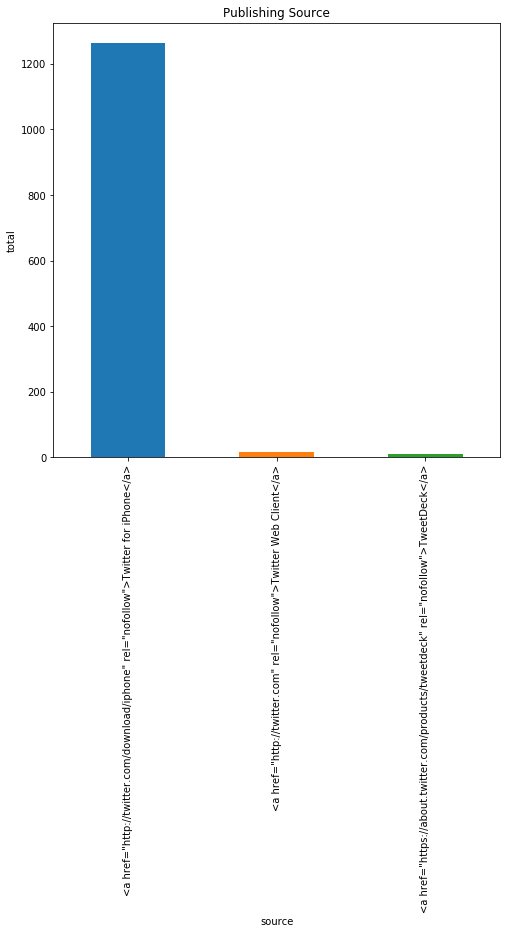

In [431]:
twitter_archive_clean.source.value_counts().plot.bar(figsize=(8,8));
plt.title('Publishing Source')
plt.xlabel('source')
plt.ylabel('total')


## phone is the most commonly used device for WeRateDogs to post tweets


# Insight three & visualization

## What's the top  favorite name for all dogs?

Oliver     8
Tucker     7
Winston    7
Penny      6
Lucy       6
Cooper     6
Bella      5
Lola       5
Bailey     5
Toby       5
Name: name, dtype: int64


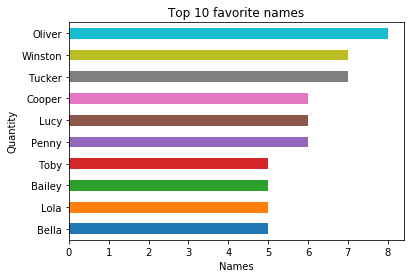

In [440]:
# Top 10 favorite names
plt.title("Top 10 favorite names")
plt.xlabel("Names")
plt.ylabel("Quantity")
print(twitter_archive_clean.name.value_counts().iloc[0:10])
twitter_archive_clean.name.value_counts().iloc[0:10].sort_values().plot("barh") 

## as we can see above , the top 10 favourite names.



# Insight three & visualization

## What type of dog is more likely to identify a dog?


In [432]:
twitter_archive_clean[twitter_archive_clean.is_dog].dog_category.value_counts().head(5)

golden_retriever      107
pembroke               71
labrador_retriever     65
chihuahua              55
pug                    44
Name: dog_category, dtype: int64

In [434]:
twitter_archive_clean[twitter_archive_clean.is_dog].groupby('dog_category').sum().rating_numerator.sort_values(ascending=False).head(5)

dog_category
golden_retriever      395.5
chihuahua             376.0
labrador_retriever    274.0
pug                   257.0
pembroke              250.0
Name: rating_numerator, dtype: float64

Text(0,0.5,'count')

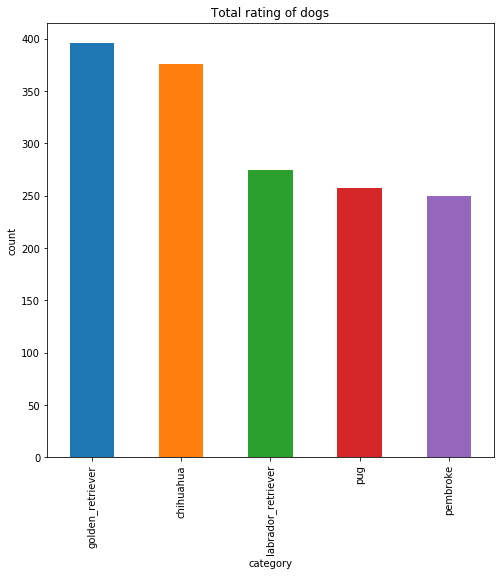

In [435]:
twitter_archive_clean[twitter_archive_clean.is_dog].groupby('dog_category').sum().rating_numerator.sort_values(ascending=False).head(5).\
plot.bar(figsize=(8,8));
plt.title('Total rating of dogs')
plt.xlabel('category')
plt.ylabel('count')

### Golden retriever is more likely to be identified.


In [436]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255